# Traffic Sign Dataset - Classification

DATASET : https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/data

In [42]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2


In [43]:
import kagglehub

dataset_path = kagglehub.dataset_download("ahemateja19bec1025/traffic-sign-dataset-classification")

print("Path to dataset files:", dataset_path)
print("Done...")

Path to dataset files: /root/.cache/kagglehub/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/versions/2
Done...


In [46]:
import os
print(os.listdir(dataset_path))


['labels.csv', 'traffic_Data']


In [51]:
dataset_dir = os.path.join(dataset_path, "traffic_Data")

if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Error: Folder 'traffic_Data' not found in {dataset_path}")

print("Images found inside:", dataset_dir)
print("Example subfolders (classes):", os.listdir(dataset_dir)[:5])

Images found inside: /root/.cache/kagglehub/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/versions/2/traffic_Data
Example subfolders (classes): ['TEST', 'DATA']


In [54]:
import os
dataset_dir = "/root/.cache/kagglehub/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/versions/2/traffic_Data/DATA"
print("Contents of DATA folder:", os.listdir(dataset_dir)[:5])  # first 5 subfolders


Contents of DATA folder: ['41', '6', '39', '16', '51']


In [55]:
dataset_dir = os.path.join(dataset_path, "traffic_Data", "DATA")  # Correct path

In [56]:
def load_data(dataset_dir):
    images, labels = [], []
    for label in os.listdir(dataset_dir):
        label_path = os.path.join(dataset_dir, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read in color
                img = cv2.resize(img, (32, 32))  # Resize to 32x32
                images.append(img)
                labels.append(int(label))  # Class label

    images = np.array(images) / 255.0  # Normalize
    labels = np.array(labels)
    return images, labels


In [57]:
# Load images n labels
images, labels = load_data(dataset_dir)

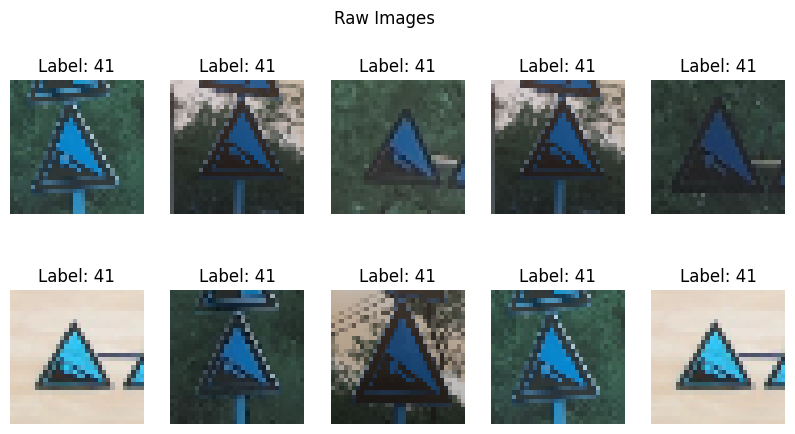

In [58]:
def show_images(images, labels, title="Sample Images"):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_images(images, labels, "Raw Images")

In [59]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

In [60]:
# Data Augmentation
datagen = ImageDataGenerator(rotation_range=15, zoom_range=0.1, horizontal_flip=True)
datagen.fit(X_train)

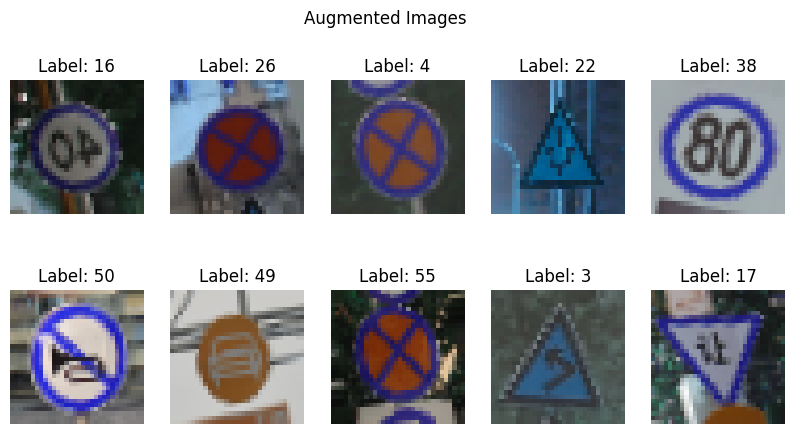

In [62]:
# Show augmented images
augmented_images = [next(datagen.flow(X_train, y_train, batch_size=1))[0][0] for _ in range(10)]

show_images(augmented_images, y_train[:10], "Augmented Images")

In [63]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(set(labels)), activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

```
datagen.flow(X_train, y_train, batch_size=32)
```

This augments the training images in real-time.
It generates a new batch of images (size = 32) in each step.
The augmented images help the model generalize better.

```validation_data=(X_test, y_test)```

The test set is not augmented (to evaluate on real-world images).
Used to check how well the model performs on unseen data.

In [66]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20,
                    verbose=1)

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8862 - loss: 0.3457 - val_accuracy: 0.8981 - val_loss: 0.3914
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8991 - loss: 0.3231 - val_accuracy: 0.8753 - val_loss: 0.4032
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9145 - loss: 0.2738 - val_accuracy: 0.8921 - val_loss: 0.3922
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9031 - loss: 0.2743 - val_accuracy: 0.9101 - val_loss: 0.3468
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9314 - loss: 0.2179 - val_accuracy: 0.9257 - val_loss: 0.2989
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.9212 - loss: 0.2464 - val_accuracy: 0.9185 - val_loss: 0.3313
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9422 - loss: 0.2003 - val_accuracy: 0.9496 - val_loss: 0.2551
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9530 - loss: 0.1403 - val_accu

In [68]:
# predictions = np.argmax(model.predict(X_test[:10]), axis=1)
# show_images(X_test[:10], predictions, "Predicted Labels")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


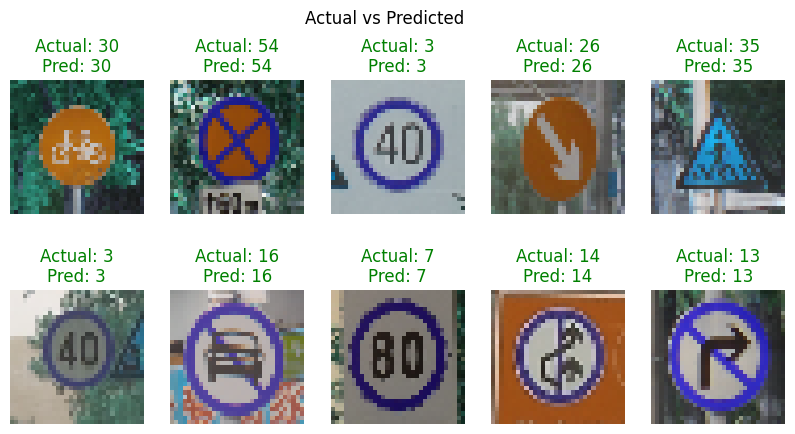

In [69]:
import numpy as np
import matplotlib.pyplot as plt

predictions = np.argmax(model.predict(X_test[:10]), axis=1)

def show_actual_vs_predicted(images, actual_labels, predicted_labels, title="Actual vs Predicted"):
    plt.figure(figsize=(10, 5))

    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])

        # If prediction is wrong, show in red
        color = "green" if actual_labels[i] == predicted_labels[i] else "red"
        plt.title(f"Actual: {actual_labels[i]}\nPred: {predicted_labels[i]}", color=color)
        plt.axis("off")

    plt.suptitle(title)
    plt.show()

show_actual_vs_predicted(X_test[:10], y_test[:10], predictions)


In [70]:
#  Save model
model.save("traffic_sign_cnn.h5")
print("Model Training Completed and Saved as 'traffic_sign_cnn.h5'!")


Model Training Completed and Saved as 'traffic_sign_cnn.h5'!


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
model.save("/content/drive/My Drive/traffic_sign_cnn.h5")
print("Model Training Completed and Saved as 'traffic_sign_cnn.h5' in Google Drive!")